In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
csv_path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/validation/validation_full_log.csv"
agent_results_df = pd.read_csv(csv_path)

In [29]:
# Set 'Step' as the index
agent_results_df = agent_results_df.set_index('Step')

# Scale the 'EffRatio' column by multiplying it by 3
agent_results_df['EffRatio'] = agent_results_df['EffRatio'] * 3

# Display the updated DataFrame (all columns should remain intact)
agent_results_df.head()


,Action,DemandScale,Reward,EffRatio,ValidHeadsRatio,Q_0,Q_1,Q_2,Q_3,Q_4,...,PumpSpeed_17,PumpSpeed_10,PumpSpeed_25,PumpSpeed_26,PumpSpeed_27,PumpPower_10,PumpPower_17,PumpPower_25,PumpPower_26,PumpPower_27
Step,,,,,,,,,,,,,,,,,,,,,
0,4,1.045781,1.847193,0.855800,0.991393,17.469923,17.494953,17.373859,17.488375,17.539974,...,1.0,1.0,1.0,1.0,1.0,26.120316,26.089383,8.474412,8.479020,12.581887
1,4,1.026884,1.443597,0.450052,0.993545,17.462465,17.499401,17.380457,17.484819,17.550209,...,1.0,1.0,1.0,1.0,1.0,25.758562,25.728434,8.262658,8.267174,12.394236
2,4,1.009120,1.719407,0.726938,0.992469,17.466099,17.479925,17.358536,17.485800,17.524511,...,1.0,1.0,1.0,1.0,1.0,25.419103,25.389721,8.061100,8.065528,12.215864
3,4,1.011388,1.813297,0.821904,0.991393,17.469978,17.494925,17.373814,17.488401,17.539902,...,1.0,1.0,1.0,1.0,1.0,25.462457,25.432980,8.086913,8.091352,12.238741
4,4,1.002695,1.775492,0.784099,0.991393,17.465672,17.497444,17.377562,17.486311,17.545750,...,1.0,1.0,1.0,1.0,1.0,25.296511,25.267396,7.987549,7.991945,12.150880


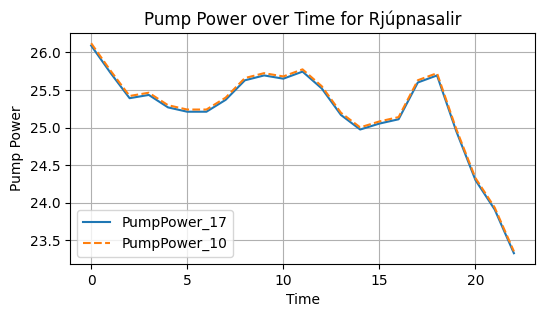

In [30]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_17'], label='PumpPower_17')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_10'], label='PumpPower_10', linestyle='--')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Rjúpnasalir")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


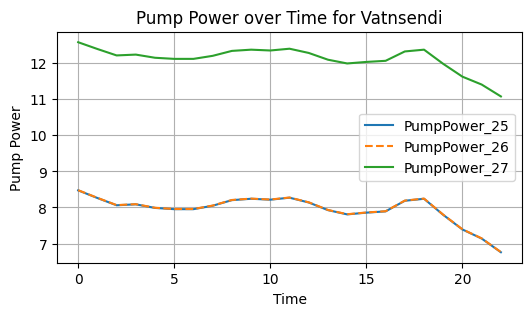

In [31]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_25'], label='PumpPower_25')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_26'], label='PumpPower_26', linestyle='--')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_27'], label='PumpPower_27')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


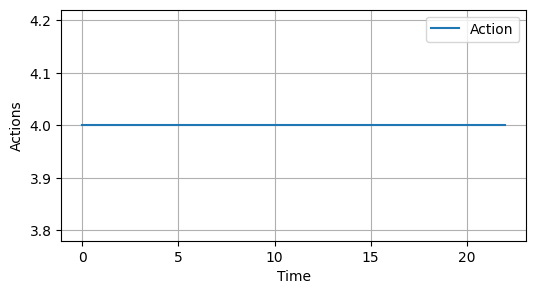

In [32]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['Action'], label='Action')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Actions")
# plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


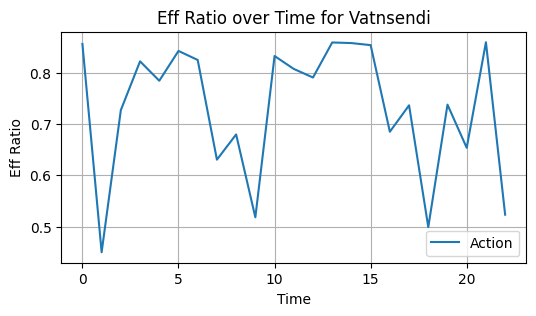

In [33]:

plt.figure(figsize=(6, 3))

# Plot the 'EffRatio' data
plt.plot(agent_results_df.index, agent_results_df['EffRatio'], label='Action')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Eff Ratio")
plt.title("Eff Ratio over Time for Vatnsendi")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


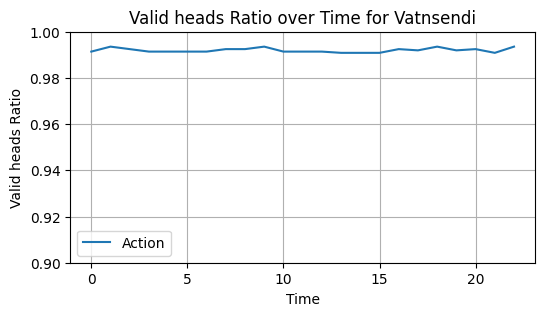

In [34]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['ValidHeadsRatio'], label='Action')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Valid heads Ratio")
plt.title("Valid heads Ratio over Time for Vatnsendi")
plt.grid(True)
plt.ylim(0.9, 1)
# Display the legend
plt.legend()

# Show the plot
plt.show()


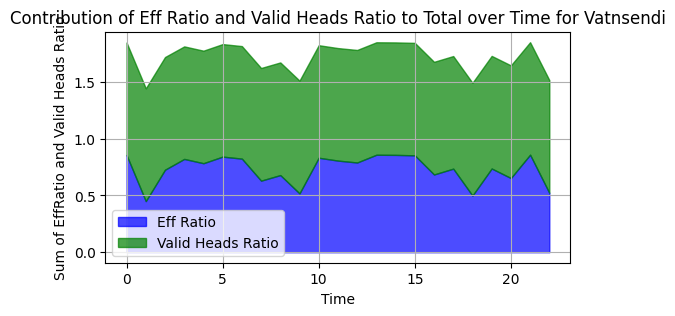

In [37]:
import matplotlib.pyplot as plt


# Create a new column for the sum of EffRatio and ValidHeadsRatio
agent_results_df['Total'] = agent_results_df['EffRatio'] + agent_results_df['ValidHeadsRatio']

plt.figure(figsize=(6, 3))

# Plot the stacked area chart
plt.fill_between(agent_results_df.index, 0, agent_results_df['EffRatio'], label='Eff Ratio', color='blue', alpha=0.7)
plt.fill_between(agent_results_df.index, agent_results_df['EffRatio'], agent_results_df['Total'], label='Valid Heads Ratio', color='green', alpha=0.7)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Sum of EffRatio and Valid Heads Ratio")
plt.title("Contribution of Eff Ratio and Valid Heads Ratio to Total over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


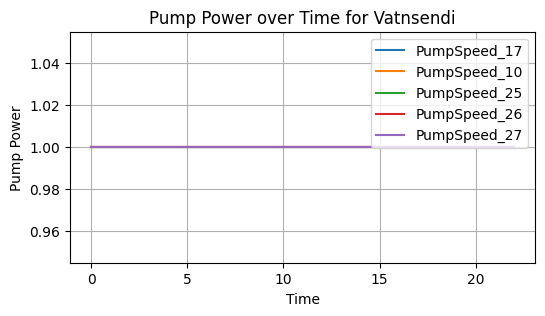

In [36]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpSpeed_17'], label='PumpSpeed_17')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpSpeed_10'], label='PumpSpeed_10')
# Plot the 'PumpPower_17' data

plt.plot(agent_results_df.index, agent_results_df['PumpSpeed_25'], label='PumpSpeed_25')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpSpeed_26'], label='PumpSpeed_26')
# Plot the 'PumpPower_10' data

plt.plot(agent_results_df.index, agent_results_df['PumpSpeed_27'], label='PumpSpeed_27')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


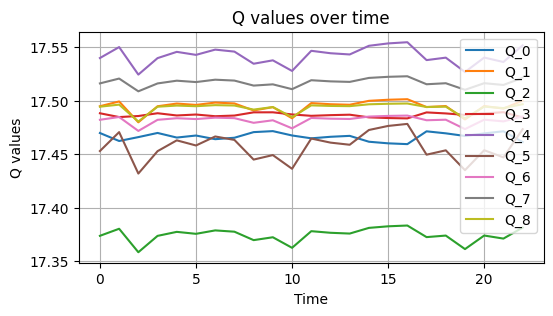

In [41]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['Q_0'], label='Q_0')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['Q_1'], label='Q_1')
# Plot the 'PumpPower_17' data

plt.plot(agent_results_df.index, agent_results_df['Q_2'], label='Q_2')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['Q_3'], label='Q_3')
# Plot the 'PumpPower_10' data

plt.plot(agent_results_df.index, agent_results_df['Q_4'], label='Q_4')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['Q_5'], label='Q_5')
# Plot the 'PumpPower_17' data

plt.plot(agent_results_df.index, agent_results_df['Q_6'], label='Q_6')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['Q_7'], label='Q_7')
# Plot the 'PumpPower_10' data

plt.plot(agent_results_df.index, agent_results_df['Q_8'], label='Q_8')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Q values")
plt.title("Q values over time")
plt.grid(True)

# Display the legend
plt.legend()
plt.legend(loc='upper right')


# Show the plot
plt.show()